In [10]:
import numpy as np 
import keras  
from keras.datasets import fashion_mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 
import matplotlib.pyplot as plt 

# Common methods

In [24]:
def model_history_plot(history):
    # plt.plot(history['loss'], label='loss')
    plt.plot(history['acc'], label='accuracy')
    plt.legend()
    plt.show()

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first': 
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    inpx = (1, img_rows, img_cols) 

else: 
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    inpx = (img_rows, img_cols, 1) 

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255


In [4]:
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

# CNN - Keras implementation

In [5]:
# def getKerasCnnModel():
inpx = Input(shape=inpx) 

layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 

layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 

layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 

layer4 = Dropout(0.5)(layer3) 

layer5 = Flatten()(layer4) 

layer6 = Dense(250, activation='sigmoid')(layer5) 

layer7 = Dense(10, activation='softmax')(layer6) 






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model = Model([inpx], layer7) 

In [27]:
#     return model

# def KerasCnnFit():
# model = getKerasCnnModel()
model.compile(optimizer=keras.optimizers.Adadelta(),loss=keras.losses.categorical_crossentropy,
          metrics=['accuracy']) 
fit = model.fit(x_train, y_train, epochs=5, batch_size=500)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0448 - acc: 0.9850
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0442 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0416 - acc: 0.9861
Epoch 4/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0418 - acc: 0.9863
Epoch 5/5
60000/60000 [==============================] - 4s 58us/step - loss: 0.0429 - acc: 0.9861


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


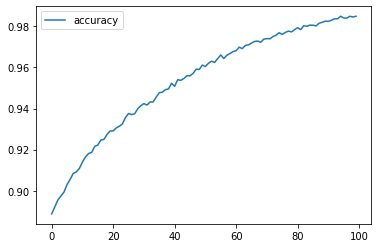

In [26]:
%time
model_history_plot(fit.history)

In [18]:
fit.history

{'loss': [0.38340462297201156,
  0.3590883697072665,
  0.34155185346802075,
  0.32619093159834545,
  0.3128534140686194],
 'acc': [0.8591166645288467,
  0.8684999982515971,
  0.8741999998688698,
  0.8797333344817162,
  0.883466666440169]}

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])

# CNN - Tensorflow implementation

# References

1. https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/